In [229]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

from plotnine import *

In [145]:
read_file = pd.read_excel ("MSN Codes.xlsx")
read_file.to_csv ("MSN Codes.csv", index = None, header=True)
read_file = pd.read_excel ("Investment_Data_Train.xlsx")
read_file.to_csv ("Investment_Data_Train.csv", index = None, header=True)
# read_file = pd.read_excel ("Investment_Data_2020.xlsx")
# read_file.to_csv ("Investment_Data_2020.csv", index = None, header=True)

In [146]:
msn_code = pd.read_csv('MSN Codes.csv')

investment_data = pd.read_csv("Investment_Data_Train.csv")

In [147]:
msn_code.head()

,MSN,Description,Unit
0,BDFDB,Biomass inputs (feedstock) to the production o...,Billion Btu
1,BDPRP,Biodiesel production,Thousand barrels
2,BFFDB,Biomass inputs (feedstock) to the production o...,Billion Btu
3,BFPRP,Biofuels production,Thousand barrels
4,CLPRB,Coal production,Billion Btu


In [148]:
investment_data.head()

,Unnamed: 0,MSN,StateCode,Year,Amount,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
0,0,BDFDB,AK,2015,21.0,Alaska,35.027804,16.0,3345612.0
1,1,BDPRP,AK,2015,4.0,Alaska,35.027804,16.0,3345612.0
2,2,BFFDB,AK,2015,21.0,Alaska,35.027804,16.0,3345612.0
3,3,BFPRP,AK,2015,4.0,Alaska,35.027804,16.0,3345612.0
4,4,CLPRB,AK,2015,17747.0,Alaska,35.027804,16.0,3345612.0


In [149]:
investment_data.columns

Index(['Unnamed: 0', 'MSN', 'StateCode', 'Year', 'Amount', 'State',
       'CO2 Emissions (Mmt)', 'TotalNumberofInvestments',
       'TotalAmountofAssistance'],
      dtype='object')

In [150]:
single_variables = investment_data[[
    'StateCode', 'Year', 'State',
    'CO2 Emissions (Mmt)', 'TotalNumberofInvestments', 'TotalAmountofAssistance'
]].drop_duplicates()
single_variables

,StateCode,Year,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
0,AK,2015,Alaska,35.027804,16.0,3345612.0
29,AL,2015,Alabama,119.200889,164.0,1864412.0
58,AR,2015,Arkansas,59.053365,477.0,13453887.0
87,AZ,2015,Arizona,94.978784,65.0,1724853.0
116,CA,2015,California,351.408516,1023.0,30077512.0
...,...,...,...,...,...,...
7497,WI,2019,Wisconsin,94.822424,103.0,2915140.0
7526,WV,2019,West Virginia,85.445996,44.0,790383.0
7555,WY,2019,Wyoming,59.096649,32.0,570570.0
7584,X3,2019,Federal Offshore - Gulf of Mexico,NaN,NaN,NaN


In [151]:
multi_variables = investment_data[[
    'StateCode', 'Year', 'State',
    'MSN', 'Amount'
]].drop_duplicates()

multi_variables

,StateCode,Year,State,MSN,Amount
0,AK,2015,Alaska,BDFDB,21.000
1,AK,2015,Alaska,BDPRP,4.000
2,AK,2015,Alaska,BFFDB,21.000
3,AK,2015,Alaska,BFPRP,4.000
4,AK,2015,Alaska,CLPRB,17747.000
...,...,...,...,...,...
7590,X3,2019,Federal Offshore - Gulf of Mexico,TEPRB,5106671.000
7591,X5,2019,Federal Offshore - Pacific,COPRK,5.698
7592,X5,2019,Federal Offshore - Pacific,PAPRB,25350.000
7593,X5,2019,Federal Offshore - Pacific,PAPRP,4449.000


In [152]:
MSN_feature_pivot = multi_variables.pivot(index=['StateCode', 'Year', 'State'], columns='MSN', values='Amount')
# MSN_feature_pivot[MSN_feature_pivot.isna().any(axis=1)]
MSN_feature_pivot

MSN                                        BDFDB  BDPRP  BFFDB  BFPRP  \
StateCode Year State                                                    
AK        2015 Alaska                       21.0    4.0   21.0    4.0   
          2016 Alaska                       27.0    5.0   27.0    5.0   
          2017 Alaska                       29.0    5.0   29.0    5.0   
          2018 Alaska                       15.0    3.0   15.0    3.0   
          2019 Alaska                        0.0    0.0    0.0    0.0   
...                                          ...    ...    ...    ...   
X5        2015 Federal Offshore - Pacific    NaN    NaN    NaN    NaN   
          2016 Federal Offshore - Pacific    NaN    NaN    NaN    NaN   
          2017 Federal Offshore - Pacific    NaN    NaN    NaN    NaN   
          2018 Federal Offshore - Pacific    NaN    NaN    NaN    NaN   
          2019 Federal Offshore - Pacific    NaN    NaN    NaN    NaN   

MSN                                          CLPRB   CLPRK   CLPRP  COPRK  \
StateCode Year State                                                        
AK        2015 Alaska                      17747.0  15.073  1177.0  5.717   
          2016 Alaska                      13942.0  14.957   932.0  5.722   
          2017 Alaska                      14365.0  14.978   959.0  5.723   
          2018 Alaska                      13752.0  15.253   902.0  5.706   
          2019 Alaska                      14867.0  15.252   975.0  5.698   
...                                            ...     ...     ...    ...   
X5        2015 Federal Offshore - Pacific      NaN     NaN     NaN  5.717   
          2016 Federal Offshore - Pacific      NaN     NaN     NaN  5.722   
          2017 Federal Offshore - Pacific      NaN     NaN     NaN  5.723   
          2018 Federal Offshore - Pacific      NaN     NaN     NaN  5.706   
          2019 Federal Offshore - Pacific      NaN     NaN     NaN  5.698   

MSN                                        EMFDB  ENPRP  ...    REPRB  SOTCB  \
StateCode Year State                                     ...                   
AK        2015 Alaska                        0.0    0.0  ...  23807.0    3.0   
          2016 Alaska                        0.0    0.0  ...  25155.0   14.0   
          2017 Alaska                        0.0    0.0  ...  23620.0   20.0   
          2018 Alaska                        0.0    0.0  ...  24158.0   28.0   
          2019 Alaska                        0.0    0.0  ...  22754.0   40.0   
...                                          ...    ...  ...      ...    ...   
X5        2015 Federal Offshore - Pacific    NaN    NaN  ...      NaN    NaN   
          2016 Federal Offshore - Pacific    NaN    NaN  ...      NaN    NaN   
          2017 Federal Offshore - Pacific    NaN    NaN  ...      NaN    NaN   
          2018 Federal Offshore - Pacific    NaN    NaN  ...      NaN    NaN   
          2019 Federal Offshore - Pacific    NaN    NaN  ...      NaN    NaN   

MSN                                            TEPRB     TETCB  WDEXB   WDPRB  \
StateCode Year State                                                            
AK        2015 Alaska                      1429942.0  614242.0    0.0  6865.0   
          2016 Alaska                      1435363.0  593662.0    0.0  7636.0   
          2017 Alaska                      1454196.0  601492.0    0.0  6501.0   
          2018 Alaska                      1410604.0  604644.0    0.0  6910.0   
          2019 Alaska                      1370342.0  605689.0    0.0  6418.0   
...                                              ...       ...    ...     ...   
X5        2015 Federal Offshore - Pacific    65465.0       NaN    NaN     NaN   
          2016 Federal Offshore - Pacific    35156.0       NaN    NaN     NaN   
          2017 Federal Offshore - Pacific    32701.0       NaN    NaN     NaN   
          2018 Federal Offshore - Pacific    27811.0       NaN    NaN     NaN   
          2019 Federal Offshore - P

In [153]:
tidy_data = MSN_feature_pivot.merge(single_variables, left_on=['StateCode', 'Year'], right_on=['StateCode', 'Year'])
tidy_data_wo_na_response = tidy_data[~tidy_data['TotalAmountofAssistance'].isna()].drop(columns=['State'])
tidy_data_wo_na_response

,StateCode,Year,BDFDB,BDPRP,BFFDB,BFPRP,CLPRB,CLPRK,CLPRP,COPRK,...,TETCB,WDEXB,WDPRB,WDTCB,WSTCB,WWPRB,WYTCB,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
0,AK,2015,21.0,4.0,21.0,4.0,17747.0,15.073,1177.0,5.717,...,614242.0,0.0,6865.0,6865.0,622.0,7488.0,1488.0,35.027804,16.0,3345612.0
1,AK,2016,27.0,5.0,27.0,5.0,13942.0,14.957,932.0,5.722,...,593662.0,0.0,7636.0,7636.0,412.0,8048.0,1563.0,33.405611,14.0,2247734.0
2,AK,2017,29.0,5.0,29.0,5.0,14365.0,14.978,959.0,5.723,...,601492.0,0.0,6501.0,6501.0,436.0,6937.0,1305.0,33.729130,18.0,13509662.0
3,AK,2018,15.0,3.0,15.0,3.0,13752.0,15.253,902.0,5.706,...,604644.0,0.0,6910.0,6910.0,456.0,7366.0,1411.0,34.514589,44.0,18236626.0
4,AK,2019,0.0,0.0,0.0,0.0,14867.0,15.252,975.0,5.698,...,605689.0,0.0,6418.0,6418.0,386.0,6803.0,1270.0,34.259440,32.0,13734021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,WY,2015,0.0,0.0,1192.0,209.0,6538240.0,17.399,375773.0,5.717,...,507121.0,0.0,4904.0,4904.0,2.0,4905.0,35009.0,64.092863,18.0,249960.0
256,WY,2016,0.0,0.0,0.0,0.0,5169939.0,17.394,297218.0,5.722,...,504984.0,0.0,4357.0,4357.0,2.0,4358.0,40522.0,61.259993,23.0,1359346.0
257,WY,2017,0.0,0.0,0.0,0.0,5516757.0,17.433,316454.0,5.723,...,534840.0,0.0,5049.0,5049.0,0.0,5049.0,39806.0,62.796487,47.0,413987.0
258,WY,2018,0.0,0.0,0.0,0.0,5315953.0,17.476,304188.0,5.706,...,557604.0,0.0,4934.0,4934.0,0.0,4934.0,36936.0,63.846081,53.0,573639.0


In [154]:
tidy_input_data = tidy_data_wo_na_response.drop(columns=['TotalAmountofAssistance'])
tidy_input_data

,StateCode,Year,BDFDB,BDPRP,BFFDB,BFPRP,CLPRB,CLPRK,CLPRP,COPRK,...,TEPRB,TETCB,WDEXB,WDPRB,WDTCB,WSTCB,WWPRB,WYTCB,CO2 Emissions (Mmt),TotalNumberofInvestments
0,AK,2015,21.0,4.0,21.0,4.0,17747.0,15.073,1177.0,5.717,...,1429942.0,614242.0,0.0,6865.0,6865.0,622.0,7488.0,1488.0,35.027804,16.0
1,AK,2016,27.0,5.0,27.0,5.0,13942.0,14.957,932.0,5.722,...,1435363.0,593662.0,0.0,7636.0,7636.0,412.0,8048.0,1563.0,33.405611,14.0
2,AK,2017,29.0,5.0,29.0,5.0,14365.0,14.978,959.0,5.723,...,1454196.0,601492.0,0.0,6501.0,6501.0,436.0,6937.0,1305.0,33.729130,18.0
3,AK,2018,15.0,3.0,15.0,3.0,13752.0,15.253,902.0,5.706,...,1410604.0,604644.0,0.0,6910.0,6910.0,456.0,7366.0,1411.0,34.514589,44.0
4,AK,2019,0.0,0.0,0.0,0.0,14867.0,15.252,975.0,5.698,...,1370342.0,605689.0,0.0,6418.0,6418.0,386.0,6803.0,1270.0,34.259440,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,WY,2015,0.0,0.0,1192.0,209.0,6538240.0,17.399,375773.0,5.717,...,9080777.0,507121.0,0.0,4904.0,4904.0,2.0,4905.0,35009.0,64.092863,18.0
256,WY,2016,0.0,0.0,0.0,0.0,5169939.0,17.394,297218.0,5.722,...,7518440.0,504984.0,0.0,4357.0,4357.0,2.0,4358.0,40522.0,61.259993,23.0
257,WY,2017,0.0,0.0,0.0,0.0,5516757.0,17.433,316454.0,5.723,...,7794586.0,534840.0,0.0,5049.0,5049.0,0.0,5049.0,39806.0,62.796487,47.0
258,WY,2018,0.0,0.0,0.0,0.0,5315953.0,17.476,304188.0,5.706,...,7711992.0,557604.0,0.0,4934.0,4934.0,0.0,4934.0,36936.0,63.846081,53.0


In [245]:
tidy_response_data = tidy_data_wo_na_response[['StateCode', 'Year', 'TotalAmountofAssistance']]
tidy_response_data

,StateCode,Year,TotalAmountofAssistance
0,AK,2015,3345612.0
1,AK,2016,2247734.0
2,AK,2017,13509662.0
3,AK,2018,18236626.0
4,AK,2019,13734021.0
...,...,...,...
255,WY,2015,249960.0
256,WY,2016,1359346.0
257,WY,2017,413987.0
258,WY,2018,573639.0


### PCA

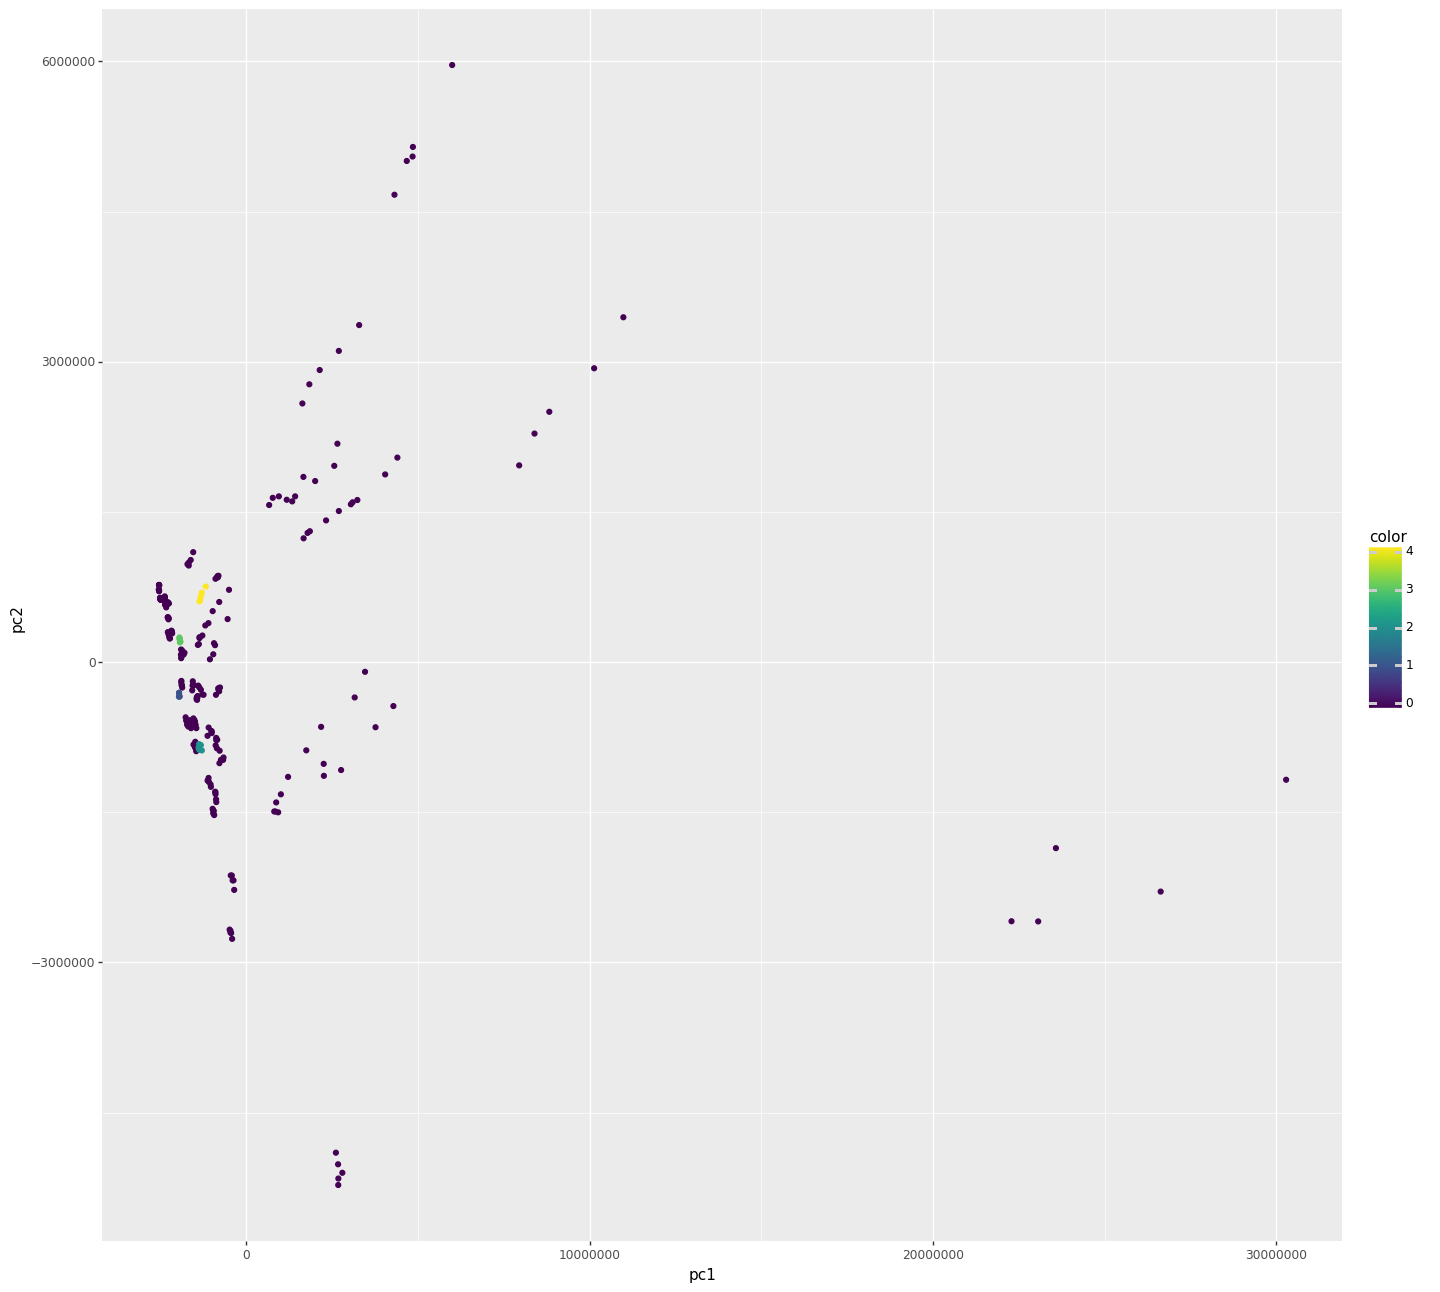

<ggplot: (681731499)>

In [286]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tidy_input_data.drop(columns=['StateCode', 'Year']))

x2d_df = pd.DataFrame(data = pca_result, columns=['pc1', 'pc2'])
x2d_df = pd.concat([tidy_input_data[['StateCode', 'Year']].reset_index(), x2d_df], axis=1)

x2d_df['color'] = 0

filterState0 = 'MA'
filterState1 = 'TN'
filterState2 = 'NE'
filterState3 = 'UT'
x2d_df.loc[
    x2d_df['StateCode']==filterState0
    ,
    'color'
] = 1
x2d_df.loc[
    x2d_df['StateCode']==filterState1
    ,
    'color'
] = 2
x2d_df.loc[
    x2d_df['StateCode']==filterState2
    ,
    'color'
] = 3
x2d_df.loc[
    x2d_df['StateCode']==filterState3
    ,
    'color'
] = 4
#x2d_df = x2d_df[x2d_df.pc1 > 0]

(ggplot(x2d_df, aes(x='pc1', y='pc2', color='color'))
  + geom_point()
  + theme(figure_size=(16, 16))
)

In [257]:
tidy_response_data.drop(columns=['Year']).sort_values(by='TotalAmountofAssistance').tail(60)
tidy_response_data.drop(columns=['Year']).groupby(by='StateCode').mean().sort_values(by='TotalAmountofAssistance').tail(50)

,TotalAmountofAssistance
StateCode,
ND,536288.6
WY,633500.4
WV,703197.8
NJ,755473.0
CT,1176844.2
DE,1180277.0
ID,1262076.6
NH,1433216.8
MT,1462675.2


### Data Standardization, test-train split (2015-2018, 2019)

In [156]:
X_variables = tidy_input_data#.drop(columns=['StateCode', 'Year'])
y_variables = tidy_response_data#.drop(columns=['StateCode', 'Year'])

train_X = X_variables[X_variables.Year < 2019].drop(columns=['StateCode', 'Year'])
train_y = y_variables[y_variables.Year < 2019].drop(columns=['StateCode', 'Year'])
test_X = X_variables[X_variables.Year == 2019].drop(columns=['StateCode', 'Year'])
compare_results = y_variables[y_variables.Year == 2019]

scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)



### Linear Regression (Elastic Net)

In [212]:
regr = ElasticNet(random_state=0, l1_ratio=0.5, alpha = 1)
regr.fit(train_X, train_y)
predictions = regr.predict(test_X)

compare_results_LR = compare_results.copy(deep=True)
compare_results_LR['predict'] = predictions.tolist()
compare_results_LR['ans_div_predict'] = compare_results_LR['TotalAmountofAssistance'] / compare_results_LR['predict']

print('RSME: ', ((compare_results_LR.predict - compare_results_LR.TotalAmountofAssistance) ** 2).mean() ** .5)
compare_results_LR.head()

RSME:  41711061.417672776


,StateCode,Year,TotalAmountofAssistance,predict,ans_div_predict
4,AK,2019,13734021.0,8.403617e+06,1.634299
9,AL,2019,840218.0,2.004888e+07,0.041908
14,AR,2019,60034678.0,3.840398e+07,1.563241
19,AZ,2019,95135122.0,1.217292e+07,7.815308
24,CA,2019,158244985.0,4.964022e+07,3.187838


### KNN regression

In [223]:
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(train_X, train_y)
KNN_predictions = neigh.predict(test_X)

KNN_compare_results = compare_results.copy(deep=True)
KNN_compare_results['predict'] = KNN_predictions.tolist()
KNN_compare_results['predict']
KNN_compare_results['LR_predict'] = predictions.tolist()
split = pd.DataFrame(KNN_compare_results['predict'].to_list(), columns = ['predict'])
KNN_compare_results = pd.concat([KNN_compare_results.drop(columns=['predict']).reset_index().drop(columns=['index']), split], axis=1)
KNN_compare_results['ans_div_predict'] = KNN_compare_results['TotalAmountofAssistance'] / KNN_compare_results['predict']

print('RSME: ', ((KNN_compare_results.predict - KNN_compare_results.TotalAmountofAssistance) ** 2).mean() ** .5)
# KNN_compare_results.head()
KNN_compare_results_view = KNN_compare_results.copy()
KNN_compare_results_view.TotalAmountofAssistance = KNN_compare_results_view.TotalAmountofAssistance/1000
KNN_compare_results_view.LR_predict = KNN_compare_results_view.LR_predict/1000
KNN_compare_results_view.predict = KNN_compare_results_view.predict/1000
KNN_compare_results_view.round(2)



RSME:  46670636.184106305


,StateCode,Year,TotalAmountofAssistance,LR_predict,predict,ans_div_predict
0,AK,2019,13734.02,8403.62,6372.40,2.16
1,AL,2019,840.22,20048.88,2184.61,0.38
2,AR,2019,60034.68,38403.98,21094.52,2.85
3,AZ,2019,95135.12,12172.92,2878.02,33.06
4,CA,2019,158244.98,49640.22,17430.75,9.08
5,CO,2019,10796.83,10539.92,4753.07,2.27
6,CT,2019,1306.18,14441.13,1691.49,0.77
7,DE,2019,1485.25,15202.33,1407.11,1.06
8,FL,2019,52936.64,33099.96,6854.07,7.72
9,GA,2019,2374.66,66493.39,75983.64,0.03


### KNN on train data

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(train_X, train_y)
KNN_predictions = neigh.predict(train_X)

KNN_compare_results = train_y.copy(deep=True)
KNN_compare_results['predict'] = KNN_predictions.tolist()
KNN_compare_results['predict']
split = pd.DataFrame(KNN_compare_results['predict'].to_list(), columns = ['predict'])
KNN_compare_results = pd.concat([KNN_compare_results.drop(columns=['predict']).reset_index().drop(columns=['index']), split], axis=1)
KNN_compare_results['ans_div_predict'] = KNN_compare_results['TotalAmountofAssistance'] / KNN_compare_results['predict']

print('RSME: ', ((KNN_compare_results.predict - KNN_compare_results.TotalAmountofAssistance) ** 2).mean() ** .5)
KNN_compare_results
# KNN_compare_results.head()

In [308]:
filtered_MSN_lst = ['BFPRP', 'CLPRB', 'ENPRP', 'GETCB', 'HYTCB', 'NGMPB', 'NUETB', 'PAPRB', 'REPRB', 'SOTCB', 'TETCB', 'WWPRB', 'WYTCB']

corr_tidy = tidy_data_wo_na_response.corr(method = 'spearman', numeric_only=True)
corr_last3 = corr_tidy.iloc[:, -3:]
corr_last3.loc[(corr_last3['TotalAmountofAssistance'] > 0.1) ]
MSN_filtered_df = corr_tidy.iloc[:, -3:].reset_index()
MSN_filtered_df[MSN_filtered_df['index'].isin(filtered_MSN_lst)]

,index,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
4,BFPRP,0.419783,0.389891,0.305276
5,CLPRB,0.317560,-0.009295,-0.152906
10,ENPRP,0.377371,0.345420,0.252728
11,GETCB,0.416013,0.255252,0.247244
12,HYTCB,0.094866,0.272681,0.218094
14,NGMPB,0.366838,0.110675,-0.049101
17,NUETB,0.664974,0.289534,0.323171
18,PAPRB,0.297733,0.098260,-0.064810
20,REPRB,0.536408,0.487344,0.419597
21,SOTCB,0.366796,0.055292,0.210624


In [310]:
tidy_response_data[tidy_response_data['StateCode'] == 'ND']
investment_data[(investment_data['MSN'] == 'BDFDB') & (investment_data['StateCode'] == 'ND')]

,Unnamed: 0,MSN,StateCode,Year,Amount,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
812,812,BDFDB,ND,2015,8545.0,North Dakota,57.923060,16.0,420940.0
2331,2331,BDFDB,ND,2016,9254.0,North Dakota,54.932061,24.0,502584.0
3850,3850,BDFDB,ND,2017,10389.0,North Dakota,56.921635,19.0,477713.0
5369,5369,BDFDB,ND,2018,9756.0,North Dakota,59.282972,30.0,520857.0
6888,6888,BDFDB,ND,2019,9718.0,North Dakota,57.152889,18.0,759349.0
